# RANDOM FOREST CLASIFICATION MODEL 






We present and import all the libraries that we are going to need throughout the model.

In [1]:
import pandas as pd
import numpy as np

#Libreria Metricas
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

#Librerias Visualizacion
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
from pylab import rcParams 
from matplotlib import pyplot

#Librerias Modelos

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 



We read and present our Database. We show the first 5 rows, the type and name of the Columns / variables that compose it. The variables that refer to business units are not going to be used in the model so we transform them to Object for a better understanding and segmentation of the variables themselves.

In [2]:
df = pd.read_csv('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Cleanning & Merging/df_cleanned.csv')

In [3]:
# We transform business unit variables into object since we do not want to use them.
df[["cliente", "gestor",
    'codigo_cartera', 'dz', 'oficina']] = df[["cliente", "gestor",
                                              'codigo_cartera', 'dz', 'oficina']].astype(object);

In [4]:
df.head(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287,ASESORAMIENTO FINANCIERO,14881,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287,ASESORAMIENTO FINANCIERO,14881,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0
2,3,1142234.34,SI,NO,ASESOR FINANCIERO,18287,TUTELA,28332,NO,SIN USO,...,75.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
3,4,1340503.88,SI,NO,ASESOR FINANCIERO,41475,ASESORAMIENTO FINANCIERO,14204,NO,SIN USO,...,94.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
4,5,1758517.70,SI,NO,ASESOR FINANCIERO,39000,ASESORAMIENTO FINANCIERO,14219,SI,COMPRADOR,...,64.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0


In [5]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## First aproach to the model

In [6]:
df = df.select_dtypes('number')

In [7]:
# Inputs y Target 
X = df.drop(['lp_seg_hogar'], axis = 1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6319236 (451374, 14)
Datos y = 451374 (451374,)


In [8]:
# Instantiate the classifier
clfforest_first_aproach = RandomForestClassifier()

In [9]:
# train the model
clfforest_first_aproach.fit(X,y)

RandomForestClassifier()

In [10]:
# Predictions
clfforest_first_aproach.predict(X)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
# We divide our DF into Training Set 80% and Test Set 20%. 
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [12]:
# Train the model
clfforest_first_aproach.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
# Predictions
clfforest_first_aproach.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [14]:
# Probabilities of having home Insurance
clfforest_first_aproach.predict_proba(X_test)[:, 1]

array([0.09, 0.32, 0.62, ..., 0.06, 0.12, 0.31])

In [15]:
# Results obtained from the model.

accuracy_score_first_aproach = accuracy_score(y_test,clfforest_first_aproach.predict(X_test))
precision_first_aproach  = precision_score(y_test,clfforest_first_aproach.predict(X_test))
recall_first_aproach = recall_score(y_test,clfforest_first_aproach.predict(X_test))
f1_score_first_aproach = f1_score(y_test,clfforest_first_aproach.predict(X_test))
roc_auc_score_first_aproach = roc_auc_score(y_test,clfforest_first_aproach.predict_proba(X_test)[:, 1])

print('== First Aproximation RandomForest ==')
print('------------------------------------')
print ('accuracy_score =', accuracy_score_first_aproach)
print('------------------------------------')
print('precision  =',precision_first_aproach)
print('------------------------------------')
print('recall =', recall_first_aproach)
print('------------------------------------')
print('f1_score =', f1_score_first_aproach)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_first_aproach)

== First Aproximation RandomForest ==
------------------------------------
accuracy_score = 0.8565272777623927
------------------------------------
precision  = 0.4099953725127256
------------------------------------
recall = 0.22554094187526516
------------------------------------
f1_score = 0.2910006568863587
------------------------------------
roc_auc_score = 0.7839915475019503


Without training: ROC AUC=0.500
Tree: ROC AUC=0.784


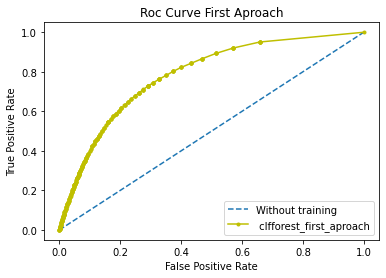

In [16]:
# We paint Roc Curve
# We generate an untrained classifier, which will assign 0 to everything
no_train = [0 for _ in range(len(X_test))]
# We calculate the AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clfforest_first_aproach.predict_proba(X_test)[:, 1])
# Print
print('Without training: ROC AUC=%.3f' % (ns_auc))
print('Tree: ROC AUC=%.3f' % (lr_auc))
# We calculate the ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfforest_first_aproach.predict_proba(X_test)[:, 1])
# We paint the ROC curves
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Without training')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clfforest_first_aproach' , color = "y")
# Axes labels
pyplot.title('Roc Curve First Aproach')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/RANDOMFOREST Model - Roc Curve First Aproach.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

## Building the Model

In [17]:
# Read Data Frame 
df_normalized = pd.read_csv('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Preprocessing/df_normalized.csv')

In [18]:
df.sample(5)

,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,lp_rbos,lp_of_int,edad,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
323023,25980.20,121.32,0.00,0.0,1,1,0,1,0,83.0,0,0,0,0,0
157645,17994.57,9525.11,0.00,0.0,0,1,0,1,1,70.0,0,0,0,0,0
38990,302.47,0.00,0.00,0.0,0,0,0,1,0,103.0,0,0,0,0,0
375591,10300.61,28086.45,0.00,0.0,1,1,0,1,1,46.0,0,0,0,0,0
269519,128746.69,0.00,97235.28,0.0,1,1,1,1,1,72.0,0,0,0,0,0


In [19]:
# Inputs y Target 
X = df_normalized.drop(['lp_seg_hogar'], axis = 1)
y= df_normalized['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6684992 (417812, 16)
Datos y = 417812 (417812,)


In [20]:
# We adjust our training and test set. (80-20)
test_size = 0.2
seed = 47
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [21]:
# Shapes Train
X_train.shape, y_train.shape

((334249, 16), (334249,))

In [22]:
# Shapes Test
X_test.shape,y_test.shape

((83563, 16), (83563,))

In [23]:
# Instantiate the classifier
clfforest = RandomForestClassifier(class_weight = 'balanced')

In [24]:
# Train the model
clfforest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [25]:
# Predictions
clfforest.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [26]:
# Probabilities of having home Insurance
clfforest.predict_proba(X_test)[:, 1]

array([0.07     , 0.05     , 0.       , ..., 0.       , 0.0080175,
       0.01     ])

In [27]:
# All Probabilities
clfforest.predict_proba(X_test)

array([[0.93     , 0.07     ],
       [0.95     , 0.05     ],
       [1.       , 0.       ],
       ...,
       [1.       , 0.       ],
       [0.9919825, 0.0080175],
       [0.99     , 0.01     ]])

__First results__. The results obtained from train and test using the recall metric as a measure show that the model is not generalizing well. There is a serious overfitting situation that I need to solve. We will confirm it by Cross Validation. To look for solutions and as a next step we will use Grid Search to search for the best parameters to use with this model and to obtain a correct metric.

In [28]:
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clfforest.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clfforest.predict(X_test)))

===========RECALL TRAIN============
recall = 0.9992111490928215
===========RECALL TEST=============
recall = 0.3788381018841591


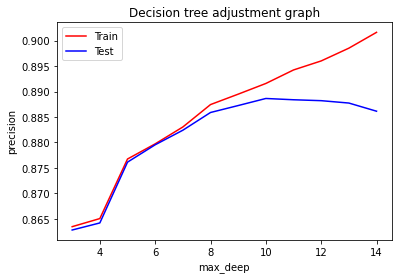

In [29]:
# Decision tree adjustment graph
train_prec =  []
eval_prec = []
max_deep_list = list(range(3, 15))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion='gini', max_depth=deep)
    arbol3.fit(X_train, y_train)
    train_prec.append(arbol3.score(X_train, y_train))
    eval_prec.append(arbol3.score(X_test, y_test))

# graphing the results.
plt.plot(max_deep_list, train_prec, color='r', label='Train')
plt.plot(max_deep_list, eval_prec, color='b', label='Test')
plt.title('Decision tree adjustment graph')
plt.legend()
plt.ylabel('precision')
plt.xlabel('max_deep')
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/RANDOMFOREST Model - Adjustment graph.png', dpi=75,bbox_inches='tight')

## Cross validation techniques.  Metrics: Cross validation
We use Cross Validation iteratting 5 times throughout the training set.

- We will set aside 1/5 samples.
- We train the model with the remaining 4/5 samples.
- We will measure with different metrics the result obtained on the set aside samples.
- This means that we do 5 independent trainings.
- The results will be the average of the 5 previous metrics.

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clfforest,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clfforest,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clfforest,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

(0.6016837065200599, 0.37346760070052537, 0.4618333325776886)

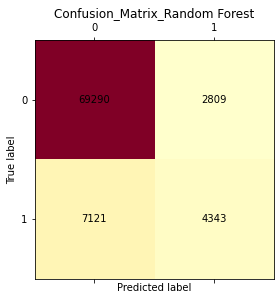

In [30]:
# Plot Confussion matrix 
matriz_confusion_clfforest = confusion_matrix(y_test,clfforest.predict(X_test))
fig, ax = plt.subplots(figsize=(4, 7))
ax.matshow(matriz_confusion_clfforest, cmap=plt.cm.YlOrRd)
for i in range(matriz_confusion_clfforest.shape[0]):
    for j in range(matriz_confusion_clfforest.shape[1]):
        ax.text(x=j, y=i, s=matriz_confusion_clfforest[i, j], va='center', ha='center')

plt.title('Confusion_Matrix_Random Forest')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/RANDOMFOREST Model - Confusion_Matrix_Random Forest.png', dpi=75,bbox_inches='tight')
plt.show()

In [31]:
# Results obtained from the Tree model.

accuracy_score_clfforest = accuracy_score(y_test,clfforest.predict(X_test))
precision_clfforest  = precision_score(y_test,clfforest.predict(X_test))
recall_clfforest = recall_score(y_test,clfforest.predict(X_test))
f1_score_clfforest = f1_score(y_test,clfforest.predict(X_test))
roc_auc_score_clfforest = roc_auc_score(y_test,clfforest.predict_proba(X_test)[:, 1])

print('==== Random Forest RESULTS ====')
print('------------------------------------')
print('accuracy_score =', accuracy_score_clfforest )
print('------------------------------------')
print('precision  =',precision_clfforest)
print('------------------------------------')
print('recall =', recall_clfforest)
print('------------------------------------')
print('f1_score =', f1_score_clfforest)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_clfforest)

==== Random Forest RESULTS ====
------------------------------------
accuracy_score = 0.8811675023634862
------------------------------------
precision  = 0.6072427293064877
------------------------------------
recall = 0.3788381018841591
------------------------------------
f1_score = 0.46658788139235063
------------------------------------
roc_auc_score = 0.8631391430825802


## Draw Roc Curve

Without training: ROC AUC=0.500
Tree: ROC AUC=0.863


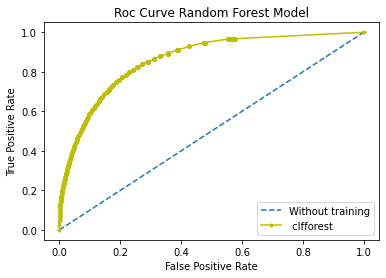

In [32]:
# We paint Roc Curve
# We generate an untrained classifier, which will assign 0 to everything
no_train = [0 for _ in range(len(X_test))]
# We calculate the AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clfforest.predict_proba(X_test)[:, 1])
# Print
print('Without training: ROC AUC=%.3f' % (ns_auc))
print('Tree: ROC AUC=%.3f' % (lr_auc))
# We calculate the ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfforest.predict_proba(X_test)[:, 1])
# We paint the ROC curves
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Without training')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clfforest' , color = "y")
# Axes labels
pyplot.title('Roc Curve Random Forest Model')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/RANDOMFOREST- Roc Curve.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

# GridSearchCV  

We evaluate and select the parameters of a model. By providing a model and the parameters to be tested, we can evaluate the performance of the former against the latter by means of cross-validation.


In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
forest_grid_params = {
    'n_estimators' : [100,125],
    'max_features' : ["auto", "log2"],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10],
    #'max_depth' : [None],
    #'min_samples_split' : [2,4,6,8,10],
    'min_samples_split' :[2]
    #'min_samples_leaf' : [20,25,30]
    }

forestgs = GridSearchCV(
        clfforest,
        forest_grid_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
        )


In [35]:
forestgs.fit(X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  7.5min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'log2'],
                         'min_samples_split': [2], 'n_estimators': [100, 125]},
             verbose=1)

In [36]:
forestgs.best_score_

0.7463896605612366

In [37]:
forestgs.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='log2')

In [38]:
forestgs.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 100}

## Build Model with best params

In [75]:
clfforest_gs = RandomForestClassifier(class_weight = 'balanced', criterion = 'gini',
                                  max_depth = 2, max_features = 'log2', min_samples_split = 2,
                                  n_estimators = 125)

In [76]:
clfforest_gs.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2,
                       max_features='log2', n_estimators=125)

In [77]:
clfforest_gs.predict(X_test)

array([1., 1., 0., ..., 0., 0., 0.])

In [78]:
clfforest_gs.predict_proba(X_test)[:, 1]

array([0.58354272, 0.59325551, 0.32695176, ..., 0.16049845, 0.30811401,
       0.20165838])

__Evaluation of overfitting__ The results obtained from train and test using the recall metric as a measure show that the overfitting has been solved by using better parameters and confirmed by Cross Validation and different metric averages.


In [43]:
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clfforest_gs.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clfforest_gs.predict(X_test)))

===========RECALL TRAIN============
recall = 0.9219914102901219
===========RECALL TEST=============
recall = 0.9214061409630147


## Metrics: Cross validation

In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clfforest_gs,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clfforest_gs,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clfforest_gs,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

(0.26800632661195284, 0.9167075306479859, 0.4143627397326789)

### Confussion Matrix

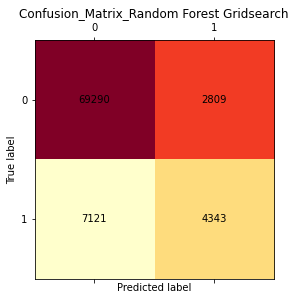

In [45]:
# Plot Confussion matrix 
matriz_confusion_clfforest_gs = confusion_matrix(y_test,clfforest_gs.predict(X_test))
fig, ax = plt.subplots(figsize=(4, 7))
ax.matshow(matriz_confusion_clfforest_gs, cmap=plt.cm.YlOrRd)
for i in range(matriz_confusion_clfforest_gs.shape[0]):
    for j in range(matriz_confusion_clfforest_gs.shape[1]):
        ax.text(x=j, y=i, s=matriz_confusion_clfforest[i, j], va='center', ha='center')

plt.title('Confusion_Matrix_Random Forest Gridsearch')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/RANDOMFOREST Model - Confusion_Matrix_Gridsearch.png', dpi=75,bbox_inches='tight')
plt.show()

In [79]:
# Results obtained from the Tree model.

accuracy_score_clfforest_gs = accuracy_score(y_test,clfforest_gs.predict(X_test))
precision_clfforest_gs  = precision_score(y_test,clfforest_gs.predict(X_test))
recall_clfforest_gs = recall_score(y_test,clfforest_gs.predict(X_test))
f1_score_clfforest_gs = f1_score(y_test,clfforest_gs.predict(X_test))
roc_auc_score_clfforest_gs = roc_auc_score(y_test,clfforest_gs.predict_proba(X_test)[:, 1])

print('==== Random Forest RESULTS ====')
print('------------------------------------')
print('accuracy_score =', accuracy_score_clfforest_gs )
print('------------------------------------')
print('precision  =',precision_clfforest_gs)
print('------------------------------------')
print('recall =', recall_clfforest_gs)
print('------------------------------------')
print('f1_score =', f1_score_clfforest_gs)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_clfforest_gs)

==== Random Forest RESULTS ====
------------------------------------
accuracy_score = 0.6535189019063461
------------------------------------
precision  = 0.2716542629586108
------------------------------------
recall = 0.9074494068387997
------------------------------------
f1_score = 0.41813541268916177
------------------------------------
roc_auc_score = 0.8262445908799105


## Curva Roc

Without training: ROC AUC=0.500
Tree: ROC AUC=0.826


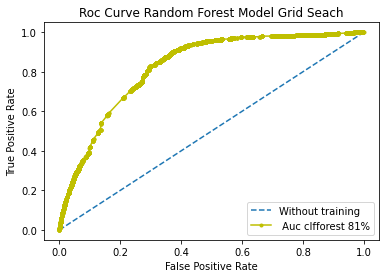

In [47]:
# We paint Roc Curve
# We generate an untrained classifier, which will assign 0 to everything
no_train = [0 for _ in range(len(X_test))]
# We calculate the AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clfforest_gs.predict_proba(X_test)[:, 1])
# Print
print('Without training: ROC AUC=%.3f' % (ns_auc))
print('Tree: ROC AUC=%.3f' % (lr_auc))
# We calculate the ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfforest_gs.predict_proba(X_test)[:, 1])
# We paint the ROC curves
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Without training')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' Auc clfforest 81%' , color = "y")
# Axes labels
pyplot.title('Roc Curve Random Forest Model Grid Seach')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/RANDOMFOREST- Roc Curve GridSearch.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

## Results evolution

In [49]:
print('Results 1rst aproach: RECALL %f, AUC %f' %(recall_first_aproach, roc_auc_score_first_aproach))
print('Results model: RECALL %f, AUC %f' %(recall_clfforest, roc_auc_score_clfforest))
print('Results model with gridsearch: RECALL %f, AUC %f' %(recall_clfforest_gs, roc_auc_score_clfforest_gs))

Results 1rst aproach: RECALL 0.225541, AUC 0.783992
Results model: RECALL 0.378838, AUC 0.863139
Results model with gridsearch: RECALL 0.921406, AUC 0.825854


 ## *** Model Conclussion ***

- The metrics chosen__ to evaluate our Random Forest classification model are __Recall and AUC - Roc Curve.__. 
- We start our model with a __first approximation__ obtaining __very improvable__ results. Recall 0.22__ The database used is the original one without any preprocessing. 
- We evolve our model. We use as database df_normalized already preprocessed in our preprocessing block. (Adapted, applied Label Encoder and Standar Scaler).  
- Since our __Target is very unbalanced__ at the rate of 87% No and 13% Yes, the parameter 'class_weight = 'balanced' has been used in the model setup.
- We obtain our first metrics related to the possibility of overfitting. 
- We see at first how our training set has not generalized well. There is a big difference between the results obtained from Test and Train. 99 Train - 37 Test. We can in this case confirm the existence of overfitting__ We can see all this on a training adjustment graph where we can see that after 8 nodes Train and Test start to separate - We tested by Cross Validation obtaining averages of different metrics. The resulting metrics of this first evolution of the model are 37% Recall and 86% Auc. 

- We need to improve the model and for this we use GridSearch to search for solutions and better parameters. Once obtained, we train again and get again Recall 92% Train - 91% Test metrics to confirm among other things that we have managed to solve the overfitting and that our model has managed to generalize well. We confirm with Cross Validation by obtaining the averages of different metrics with 5 validations.
 
- Our finally chosen metrics are Reccal 0.92 and AUC 0.82 which we consider appropriate for the explanation of our model. 
- Confusion Matrix. In the diagonal of hits we have 69264 and 4358. In our model, the detection of clients who do want to take out insurance takes precedence.  We need to obtain a good rate of true positives. Recall that our target metrics are Recall and AUC. By detecting those customers who are likely to have home insurance, we can work more directly. All this with the objective of time optimization and commercial efficiency. The Recall result obtained is optimal, with 91% and 82% in AUC.
- We are missing, among many others, variables and data such as customer income, children, type of work, real salary in euros obtained, place of residence ... etc. 
- We will continue to search with other models for better results with the available variables.

## Testing Clients

In [156]:
X_new = pd.DataFrame({'edad':[60], 'saldo_captacion':[5000], 'saldo_financiacion':[800], 'seg_valor':[1],
       'saldo_ffii':[0], 'saldo_plp':[10000], 'lp_dom_ingresos':[1], 'camino_digital':[2], 
       'seg_recorrido':[1], 'marca_ccte':[0], 'lp_seg_vida':[1], 'lp_seg_auto':[1], 'marca_bp':[0],
       'lp_tjta_cto':[1], 'lp_tjt_rev':[0],'lp_seg_acc':[0]})

In [157]:
clfforest_gs.predict(X_new)

array([0.])

In [158]:
clfforest_gs.predict_proba(X_new)

array([[0.54239216, 0.45760784]])

In [122]:
X.columns

Index(['saldo_captacion', 'saldo_financiacion', 'edad', 'seg_valor',
       'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos', 'camino_digital',
       'seg_recorrido', 'marca_ccte', 'lp_seg_vida', 'lp_seg_auto', 'marca_bp',
       'lp_tjta_cto', 'lp_tjt_rev', 'lp_seg_acc'],
      dtype='object')